<a href="https://colab.research.google.com/github/azydek0/python-homework_04/blob/kamil/project_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install astropy
!pip install astroplan
!pip install timezonefinder[numba]
!pip install geopy

In [12]:
import matplotlib
import numpy as np
import pytz
from astroplan import Observer
from astropy import units as u
from astropy.time import Time
from geopy import geocoders
from matplotlib import pylab as plt
from matplotlib.ticker import EngFormatter
from timezonefinder import TimezoneFinder
%matplotlib inline

In [13]:
# Input variables
# Localization - fomat: 'City, Country'
city = 'Paris, France'

# Date = format: 'YYYY-MM-DD'
date_city = '2004-05-20'

In [14]:
# Klasa - arg1= lokalizacja (string, format: 'Miasto, Kraj'), arg2= data (format: "RRRR-MM-DD", ale może działają też inne, trzeba sprawdzić)
class TravelerInTimeAndSapce():
    def __init__(self, location, date):
        locator = geocoders.Nominatim(user_agent='myGeocoder').geocode(location)
        date_time = Time
        timezone = TimezoneFinder().timezone_at(lng=locator.longitude , lat=locator.latitude)
        self.lat = locator.latitude * u.deg
        self.lon = locator.longitude * u.deg
        self.address = locator.address
        self.time = Time(date).to_datetime(pytz.timezone(timezone))
        self.tzname = self.time.timetz().tzname()
    def __repr__(self):
        return ('lat=' + str(self.lat) + 
            '; lon=' + str(self.lon) + 
            '; address=' + str(self.address) + 
            '; time=' + str(self.time) + 
            '; tz=' + str(self.tzname))

In [15]:
# Użycie i wywołanie metod powyższej klasy
traveler = TravelerInTimeAndSapce(city, date_city)

In [101]:
# Set observer and time ticks
observe_time = Time(traveler.time)
observe_time = observe_time + np.linspace(0, 24, 51)*u.hour
observer = Observer(
    longitude=traveler.lon, 
    latitude=traveler.lat, 
    elevation=230*u.m, 
    name=traveler.address, 
    timezone=traveler.tzname)
print(np.linspace(0, 24, 51)*u.hour)

[ 0.    0.48  0.96  1.44  1.92  2.4   2.88  3.36  3.84  4.32  4.8   5.28
  5.76  6.24  6.72  7.2   7.68  8.16  8.64  9.12  9.6  10.08 10.56 11.04
 11.52 12.   12.48 12.96 13.44 13.92 14.4  14.88 15.36 15.84 16.32 16.8
 17.28 17.76 18.24 18.72 19.2  19.68 20.16 20.64 21.12 21.6  22.08 22.56
 23.04 23.52 24.  ] h


In [93]:
# function to convert from 'datetime' to 'iso'
def iso_tz(date, tzname):
    return date.to_datetime(timezone=pytz.timezone(tzname)).isoformat()

In [118]:
# Tutaj przykład z danymi
# Powinno to wyglądać podobnie w finalnej wersji
# Poniżej użyłem matplotliba do zrobienia wykresu typu polar, wydaje mi się że jest ok
# UWAGA azymut podawany jest w radianach na potrzeby wykresu typu polar

obs_time = observer.sun_altaz(observe_time).obstime
# sun
obs_sun_az = observer.sun_altaz(observe_time).az.radian
obs_sun_alt = observer.sun_altaz(observe_time).alt.value
# moon
obs_moon_az = observer.moon_altaz(observe_time).az.radian
obs_moon_alt = observer.moon_altaz(observe_time).alt.value
# sunrise
obs_sun_rise_time = observer.sun_rise_time(observe_time[0], which='next')
obs_sun_rise_az = observer.sun_altaz(obs_sun_rise_time).az.radian
# sunset
obs_sun_set_time = observer.sun_set_time(observe_time[0], which='next')
obs_sun_set_az = observer.sun_altaz(obs_sun_set_time).az.radian
# noon
obs_noon_time = observer.noon(observe_time[0], which='next')
obs_noon_az = observer.sun_altaz(obs_noon_time).az.radian
obs_noon_alt = observer.sun_altaz(obs_noon_time).alt.radian
# moonrise
obs_moon_rise_time = observer.moon_rise_time(observe_time[0], which='next')
obs_moon_rise_az = observer.moon_altaz(obs_moon_rise_time).az.radian
# moonset
obs_moon_set_time = observer.moon_set_time(observe_time[0], which='next')
obs_moon_set_az = observer.sun_altaz(obs_moon_set_time).az.radian
# midnight
obs_midnight_time = observer.midnight(observe_time[0], which='next')
obs_midnight_az = observer.sun_altaz(obs_midnight_time).az.radian
obs_midnight_alt = observer.sun_altaz(obs_midnight_time).alt.radian
print(obs_sun_alt[25])


61.13535835649561


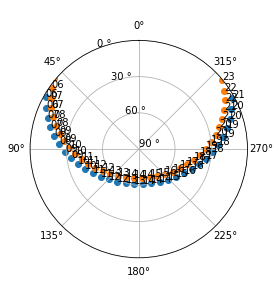

In [95]:
# Example of interpretation data using matplotlib
# UWAGA, trajektoria księżyca jest myląca. Wyświetlane są dane w danym dniu od godziny 00 do godz 24, więc nie ma punktów dla księżyca z dnia poprzedniego.
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
s = ax.scatter(obs_sun_az, obs_sun_alt)
m = ax.scatter(obs_moon_az, obs_moon_alt)

for i, txt in enumerate(obs_time):
    ax.annotate(iso_tz(txt, traveler.tzname)[11:13], (obs_sun_az[i], obs_sun_alt[i]))

for i, txt in enumerate(obs_time):
    ax.annotate(iso_tz(txt, traveler.tzname)[11:13], (obs_moon_az[i], obs_moon_alt[i]))

ax.set_theta_zero_location('N')
ax.set_rlim(90, 0, 1)
ax.set_rticks([90, 60, 30, 0])
ax.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

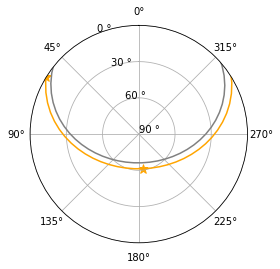

In [144]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
s = ax.plot(obs_sun_az, obs_sun_alt, color='orange')
m = ax.plot(obs_moon_az, obs_moon_alt, color='grey')
s_rise = ax.scatter(obs_sun_rise_az, 0, s=90, marker='*', c='orange')
s_noon = ax.scatter(obs_sun_az[25], obs_sun_alt[25], s=90, marker='*', c='orange')

#for i, txt in enumerate(obs_time):
    #ax.annotate(iso_tz(txt, traveler.tzname)[11:13], (obs_sun_az[i], obs_sun_alt[i]))

#for i, txt in enumerate(obs_time):
    #ax.annotate(iso_tz(txt, traveler.tzname)[11:13], (obs_moon_az[i], obs_moon_alt[i]))

ax.set_theta_zero_location('N')
ax.set_rlim(90, 0, 1)
ax.set_rticks([90, 60, 30, 0])
ax.yaxis.set_major_formatter(EngFormatter(unit=u"°"))

